In [1]:
import pandas as pd
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [2]:
df = pd.read_csv("data_daily.csv")

In [3]:
df.isna().sum()

# Date           0
Receipt_Count    0
dtype: int64

In [4]:
df.shape

(365, 2)

In [5]:
df.head()

,# Date,Receipt_Count
0,1/1/2021,7564766
1,1/2/2021,7455524
2,1/3/2021,7095414
3,1/4/2021,7666163
4,1/5/2021,7771289


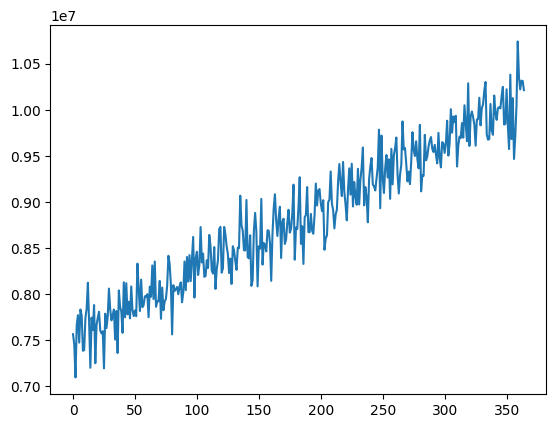

In [6]:
plt.plot(df['Receipt_Count'])

In [7]:
sums = [0 for i in range(12)]
for i in range(1, 13):
  for j in range(len(df['# Date'])):
    if int(df['# Date'][j].split("/")[0]) == i:
      sums[i-1] += df['Receipt_Count'][j]

In [8]:
df1 = pd.DataFrame(data = {'Month': [i for i in range(1, 13)], 'Receipt_Count': sums})
df1['Receipt_Count'] /= 1000000

In [11]:
df1.head()

,Month,Receipt_Count
0,1,236.736687
1,2,220.033460
2,3,248.608625
3,4,250.644830
4,5,263.151748


In [12]:
X, y = list(df1['Month']), list(df1['Receipt_Count'])

In [13]:
x_train = np.array(X[:11], dtype=np.float32)
x_train = Variable(torch.from_numpy(x_train.reshape(-1, 1)))

y_train = np.array(y[:11], dtype=np.float32)
y_train = Variable(torch.from_numpy(y_train.reshape(-1, 1)))

x_test = np.array(X[11:], dtype=np.float32)
x_test = Variable(torch.from_numpy(x_test.reshape(-1, 1)))

y_test = np.array(y[11:], dtype=np.float32)
y_test = Variable(torch.from_numpy(y_test.reshape(-1, 1)))

In [14]:
class regressionModel(nn.Module):
  def __init__(self):
    super(regressionModel, self).__init__()
    self.fc1 = nn.Linear(1, 1)

  def forward(self, x):
    out = self.fc1(x)
    return out

model = regressionModel()

num_epochs = 8500
learning_rate = 0.001

optimizer = optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

losses = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  pred_outputs = model(x_train)
  loss = criterion(pred_outputs, y_train)

  loss.backward()
  optimizer.step()

  losses.append(loss.item())
  print("Train Loss in Epoch", epoch, ":", losses[-1])

model.eval()
with torch.no_grad():
  pred_outputs = model(x_test)
  test_loss = criterion(pred_outputs, y_test)
  print("Pred:", pred_outputs, "Actual:", y_test)
  print("Test Loss: ", test_loss.item())

Streaming output truncated to the last 50 lines.
Train Loss in Epoch 8453 : 50.93355941772461
Train Loss in Epoch 8454 : 50.927223205566406
Train Loss in Epoch 8455 : 50.92086410522461
Train Loss in Epoch 8456 : 50.91450119018555
Train Loss in Epoch 8457 : 50.90809631347656
Train Loss in Epoch 8458 : 50.90178298950195
Train Loss in Epoch 8459 : 50.895511627197266
Train Loss in Epoch 8460 : 50.889244079589844
Train Loss in Epoch 8461 : 50.882957458496094
Train Loss in Epoch 8462 : 50.8765869140625
Train Loss in Epoch 8463 : 50.8702392578125
Train Loss in Epoch 8464 : 50.86404037475586
Train Loss in Epoch 8465 : 50.85769271850586
Train Loss in Epoch 8466 : 50.85140609741211
Train Loss in Epoch 8467 : 50.845149993896484
Train Loss in Epoch 8468 : 50.838844299316406
Train Loss in Epoch 8469 : 50.832542419433594
Train Loss in Epoch 8470 : 50.82627868652344
Train Loss in Epoch 8471 : 50.81999588012695
Train Loss in Epoch 8472 : 50.813724517822266
Train Loss in Epoch 8473 : 50.807533264160156

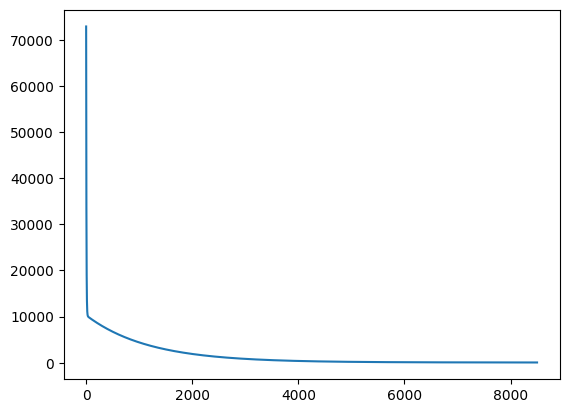

In [18]:
plt.plot(losses)
plt.show()

In [15]:
slope, intercept = model.fc1.weight.item(), model.fc1.bias.item()
print(f'Best-fit line: y = {slope:.2f}x + {intercept:.2f}')

Best-fit line: y = 7.81x + 216.63


In [29]:
torch.save(model.state_dict(), 'fetch_model.pkl')

In [31]:
new_model = regressionModel()
new_model.load_state_dict(torch.load('fetch_model.pkl'))

<All keys matched successfully>

In [33]:
month = input("Enter month of 2022 for which we want to predict the sales: ")

Enter month of 2022 for which we want to predict the sales: 13


In [34]:
user_input = np.array([month], dtype=np.float32)
user_output = Variable(torch.from_numpy(user_input.reshape(-1, 1)))
print(new_model(user_output))

tensor([[318.1373]], grad_fn=<AddmmBackward0>)
